<a href="https://colab.research.google.com/github/Rajeev064/Digit-classification-/blob/main/Digit_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
# print(tf.__version__)
 
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
 
# from google.colab import files
# file = files.upload()
# train = pd.read_csv('train.csv',header=None)
# test = pd.read_csv('test.csv',header=None)

In [ ]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

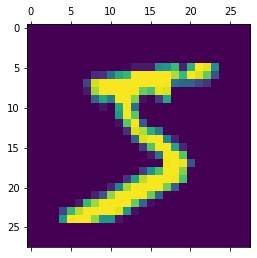

In [ ]:
plt.matshow(x_train[0])

In [ ]:
y_train[0]

5

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [ ]:
model = keras.Sequential([
                          keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

In [ ]:
model.fit(x_train_flattened,y_train,epochs=50)

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2483 - accuracy: 0.9322
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2465 - accuracy: 0.9319
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2449 - accuracy: 0.9325
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2430 - accuracy: 0.9333
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2415 - accuracy: 0.9342
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2409 - accuracy: 0.9333
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2396 - accuracy: 0.9343
Epoch 8/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2380 - accuracy: 0.9347
Epoch 9/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2375 - accuracy: 0.9344
Epoch 10/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.236

In [ ]:
y_predict = model.predict(x_test_flattened)

In [ ]:
y_predict[0]

array([3.0192810e-11, 9.5953390e-20, 3.3382952e-10, 1.7266834e-04,
       1.4133458e-09, 1.7530070e-06, 8.4437058e-18, 3.4207594e-01,
       1.0759825e-06, 2.0108933e-05], dtype=float32)

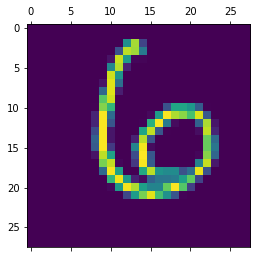

In [ ]:
plt.matshow(x_test[100])

In [ ]:
np.argmax(y_predict[100])

6

In [ ]:
y_label = [np.argmax(i) for i in y_predict]
y_label[:5]

[7, 2, 1, 0, 4]

In [ ]:
cf = tf.math.confusion_matrix(labels=y_test,predictions=y_label)

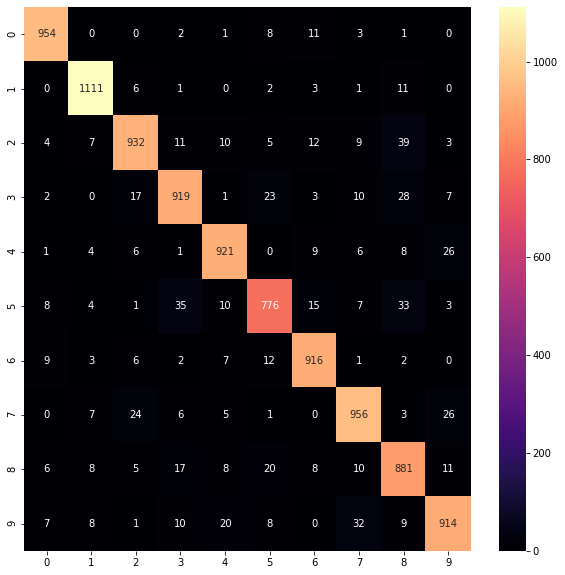

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,10))
sn.heatmap(cf,annot=True,cmap='magma',fmt='d')

In [ ]:
model = keras.Sequential([
                          keras.layers.Dense(100,input_shape=(784,),activation='relu'),
                          keras.layers.Dense(10,activation='sigmoid')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

In [ ]:
model.fit(x_train_flattened,y_train,epochs=50)

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2904 - accuracy: 0.9200
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1379 - accuracy: 0.9588
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1005 - accuracy: 0.9705
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0774 - accuracy: 0.9764
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0631 - accuracy: 0.9807
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0527 - accuracy: 0.9839
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0427 - accuracy: 0.9872
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0359 - accuracy: 0.9891
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0297 - accuracy: 0.9913
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.027

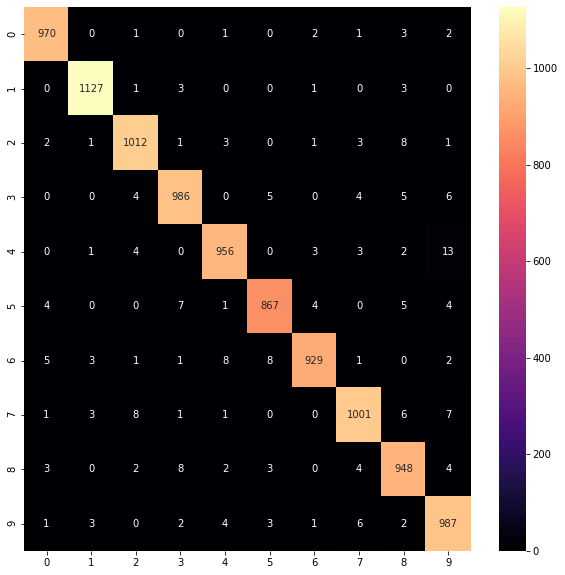

In [ ]:
y_predict = model.predict(x_test_flattened)
y_label = [np.argmax(i) for i in y_predict]
cf = tf.math.confusion_matrix(labels=y_test,predictions=y_label)
plt.figure(figsize=(10,10))
sn.heatmap(cf,annot=True,cmap='magma',fmt='d')